# Одномерная оптимизация (10 баллов)

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

В данном домашнем задании рассмотриваются несколько базовых подходов одномерной оптимизации, не использующих знания о градиенте функции. Для его выполнения потребуется следующее определение:

__Определение.__ Одномерная функция $f: [a, b] \to \mathbb{R}$ называется _унимодальной_ на $[a, b]$, если существует $c^{*} \in [a, b]$ такое, что:

1. Для произвольных $x, y \in [a, c^{*}]$, таких что $x < y$, выполнено $f(x) > f(y)$;

2. Для произвольных $x, y \in [c^{*}, b]$, таких что $x < y$, выполнено $f(x) < f(y)$.

Говоря менее формально, мы рассматриваем функции на отрезке, которые строго убывают слева от минимума и строго возрастают справа от него. Из определения незамедлительно следует, что минимум на отрезке $[a, b]$ единственен.

Описание метода __дихотомии__ (бисекции) для поиска минимума унимодальных функций:

1. __Инициализация:__

1.1. Задается унимодальная функция $f(x)$, которая имеет единственный минимум на интервале $[a,b]$.

1.2. Задается начальный интервал $[a,b]$, на котором ищется минимум.

1.3. Задается параметр $\varepsilon$ — точность, с которой нужно найти минимум.

2. __Итеративный шаг метода:__

2.1. Интервал $[a,b]$ делится пополам, и вычисляется середина интервала:

$$c = \frac{a + b}{2}$$

2.2. Выбираются две точки $x_1$ и $x_2$, близкие к середине интервала $c$, но не совпадающие с ней:

$$x_{1} = c - \delta, \quad x_{2} = c + \delta,$$

где $\delta$ небольшое положительное число, обычно $\delta \ll \varepsilon$, поэтому возьмите $\delta = \frac{\varepsilon}{10}$.

2.3. Вычисляются значения функции в точках $x_1$ и $x_2$:

$\bullet$ Если $f(x_{1}) < f(x_{2})$, то минимум находится на отрезке $[a, x_{2}]$, поэтому зона поиска оптимума сужается до $[a, x_2]$.

$\bullet$ Если $f(x_{1}) > f(x_{2})$, то минимум находится на отрезке $[x_{1}, b]$, поэтому зона поиска оптимума сужается до $[x_1, b]$.

$\bullet$ Если $f(x_{1}) = f(x_{2})$, то минимум находится на отрезке $[x_{1}, x_{2}]$, поэтому зона поиска оптимума сужается до $[a, x_{2}]$ или $[x_1, b]$.

3. __Проверка точности:__

$\bullet$ Если длина нового интервала меньше заданной точности $\varepsilon$, то процесс завершается и возвращается значение $c_{\text{out}}$ ($c$ с последней итерации).

$\bullet$ Если длина нового интервала больше заданной точности $\varepsilon$, то повторяется шаг 2 для нового интервала.

__а) (0.5 балла)__ Докажите, что данный алгоритм находит минимум унимодальной функции на отрезке $[a, b]$ с точностью $\varepsilon$ .

In [152]:
# Ваше решение (Markdown)

Чтобы доказать, что данный алгоритм находит минимум, нужно доказать
1) На каждой итерации искомый минимум находится внутри промежутке
2) Сходимость

# Докажем (1)
# Индукция:
**База:** Функция унимодальна -> имеет единственный минимум на начальном промежутке.

**Шаг индукции:**
При итерации вычисляется середины и берутся две точки, отстоящие на малое
расстояние от центра (т.к. $\delta$ << $\varepsilon$).
Исходя из свойства унимодальности есть три случая:


*   f(x1) < f(x2)
Тогда из унимодальности функция убывает слева от минимума и возрастает справа,
значит минимум c* должен находиться в левой части -> берём для следующей итерации [a,x2]

*   f(x1) > f(x2)
Аналогично предыдущему-> берём для следующей итерации [x1,b]

*   f(x1) = f(x2)
Из унимодальности -> минимум находится между точками x1 и x2, берём любой интервал из [a,x2] и [x1,b]

## Докажем (2)
Интервал при следующей итерации вычисляется как
(c + $\delta$) - a  или как  b - (c - $\delta$)

L0 = b-a <br>
L1 = L0/2 + $\delta$<br>
L2 = L0/2 + $\delta$(1+1/2)<br>
L3 = L0/2 + $\delta$(1+1/2+1/4) <- дельта становится меньше в два раза, так как берём $L_{k+1}$ = $L_k$/2 + $\delta$<br>, но отрезки делятся в 2 раза <br>
...<br>
L_n = L_0 / 2^n + $\delta$(1 + 1/2 + 1/4 + ... + $(1/2)*2^{-n}$)<br>

Из геометрической прогрессии ->
L_n = L_0/($2^n$) + 2 * $\delta$ * ($1-2^{-n}$) <br>
$\delta$ = $\varepsilon$/10 $=>$ L_n = L_0/($2^n$) + 2 * $\varepsilon/5$ * ($1-2^{-n}$) <br>
Видно, что при больших n $=>$ L_n < $\varepsilon$

**Доказано**

__б) (0.5 балла)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{\text{out}} - c^*| \leq \varepsilon$)?

Необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

__Замечание__. Величиной $\delta$ надо пренебречь.

In [153]:
# Ваше решение (Markdown)

# Ответ:
Из доказанного выше, пренебрегая $\delta$: <br>
$L_n = \frac{b-a}{2^n} $<br>
Из критерия останова: $L_n < ɛ$<br>
Выразив n $=>$ Итерационная сложность будет O($log_2(\frac{b-a}{ɛ})$) <br>
Оракульная сложность также составляет O($log_2(\frac{b-a}{ɛ})$), так как количество вычислений на каждой итерации = 2 (=const), так как f(x) всегда вычисляется два раза

__в) (1 балл)__ Придумайте свою унимодальную функцию на отрезке.

1. Покажите, что она является унимодальной на этом отрезке (аналитически).

2. Найдите $c^{*}$ (аналитически).

3. Нарисуйте график функции.

In [154]:
# Ваше решение (Markdown)

# Ответ:

f(x) = x^2 - 4x + 5
Исследуемый отрезок: [0,6]

Аналитическое решение: <br>
f'(x) = 2x - 4 <br>
f'(x) = 0 -> x = 2 <br>
Значение производной в точке <2 -> f'(1) = 2 - 4 = -2 <0 - функция строго убывает <br>
Значение производной в точке >2 -> f'(4) = 8 - 4 = 4 >0 - функция строго возрастает <br>
(f''(x) = 2 = const - вогнутость не меняется) <br>
Таким образом, аналитически было показано, что функция унимодальна на отрезке, c* = 2

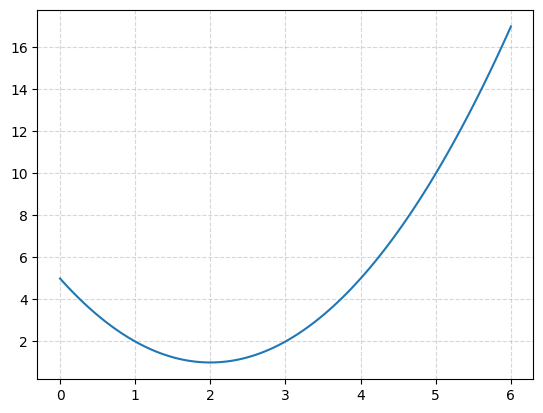

In [155]:
# Ваше решение (Code)
fig, ax = plt.subplots()
x=np.linspace(0, 6, 100)
y = x**2 -4*x +5
ax.plot(x,y)
plt.grid(True, 'both', linestyle='--', alpha=0.5)
plt.show()

__г) (1.5 балла)__ Реализуйте метод дихотомии.

In [156]:
from decimal import Decimal, getcontext

In [157]:
def dichotomy_method(f, a, b, c_star, max_iter=100, epsilon=1e-12, **params):
    """
    Метод дихотомии для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        max_iter (int, optional): Максимальное количество итераций. По умолчанию 100.
        epsilon (float, optional): Точность поиска.
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-12.
        **params: Именованные гиперпараметры метода.
            params['delta'] - значение гиперпараметра для поиска точек x1 и x2.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """

    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")

    history = []

    # YOUR CODE HERE

    getcontext().prec = 50

    a = Decimal(a)
    b = Decimal(b)
    c_star_dec = Decimal(c_star)
    epsilon_dec = Decimal(epsilon)

    delta_dec = Decimal(str(params.get('delta', epsilon/10.0)))


    cur_iter = 0
    history.append(float( float(a + b) / 2.0 - float(c_star)))
    while cur_iter < max_iter and (b - a) > epsilon_dec:

        c = (a + b) / Decimal('2')

        x1 = max(a, c - delta_dec)
        x2 = min(b, c + delta_dec)

        if f(float(x1)) > f(float(x2)):
            a = x1
        else:
            b = x2

        current_center = float((a + b) / Decimal('2'))
        history.append(abs(current_center - c_star))
        cur_iter += 1

    c = float((a + b) / Decimal('2'))
    return c, history

Постройте сравнительный график зависимости точности метода $|c_{\text{out}} - c^*|$ и теоретической оценки от числа итераций. Значение $\delta$ выберите равным $10^{-8} \cdot (b - a)$. График должен соответствовать следующим критериям:

1. Размер должен быть удобен для чтения
2. Масштаб осей (обычный или логарифмический)
3. Подписи осей
4. Легенда (так как на графике несколько линий)
5. Толщина/цвет/сетка (на ваше усмотрение, но должно быть читаемо)

In [158]:
a, b = 0.0, 6.0
c_star = 2.0
delta = (b-a)*1e-8

def f(x):
    return x**2 - 4*x + 5

c, history = dichotomy_method(f, a, b, c_star, delta=delta, epsilon=1e-6)
print(history)

[1.0, 0.49999996999999996, 0.2500000149999999, 0.12499997749999991, 0.06250001875000022, 0.03124997937500007, 0.015625019687500075, 0.007812479843749998, 0.0039062699218748165, 0.0019531049609375906, 0.000976582480468835, 0.0004882612402343778, 0.0002441606201171176, 0.00012205031005851907, 6.105515502907721e-05, 3.049757751472093e-05, 1.5278788757289163e-05, 7.609394378604861e-06, 3.8346971891201065e-06, 1.8873485947423774e-06, 9.736742971888646e-07, 4.568371487767564e-07, 2.58418574539121e-07, 9.920928722984002e-08]


[3.00000006, 1.5000000900000001, 0.750000105, 0.37500011250000004, 0.18750011625000002, 0.093750118125, 0.046875119062500005, 0.023437619531250002, 0.011718869765625, 0.0058594948828125, 0.00292980744140625, 0.0014649637207031251, 0.0007325418603515625, 0.0003663309301757813, 0.00018322546508789064, 9.167273254394532e-05, 4.589636627197266e-05, 2.300818313598633e-05, 1.1564091567993164e-05, 5.8420457839965824e-06, 2.981022891998291e-06, 1.5505114459991456e-06, 8.352557229995728e-07, 4.776278614997863e-07, 2.9881393074989317e-07, 2.094069653749466e-07, 1.647034826874733e-07, 1.4235174134373665e-07, 1.3117587067186832e-07, 1.2558793533593417e-07, 1.227939676679671e-07, 1.2139698383398356e-07, 1.2069849191699177e-07]


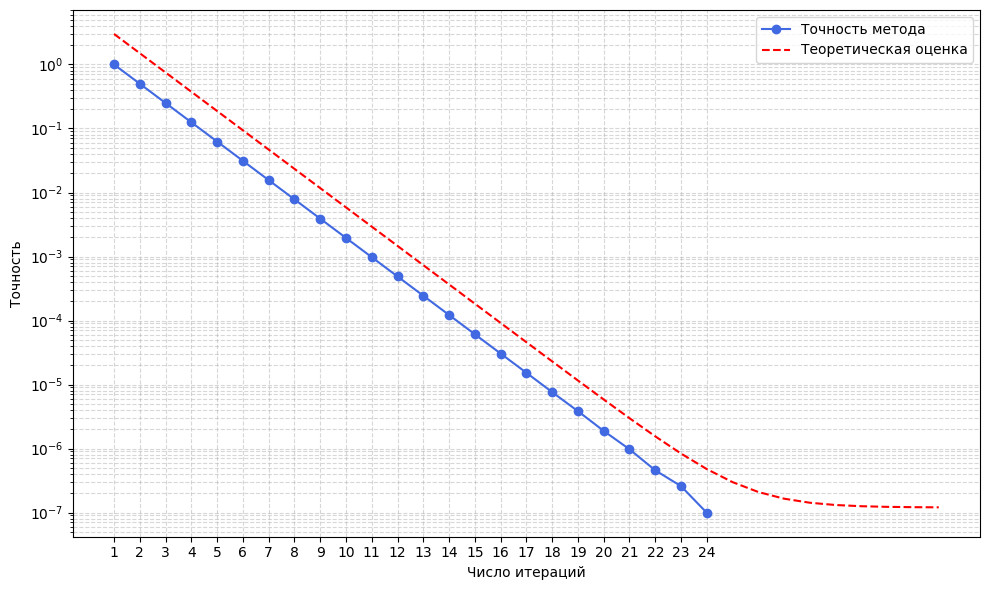

In [159]:
iterations = list(range(1, len(history)+1))
iterations2 = list(range(1, len(history)+10))
theor = [b-a]
for i in range(1, len(history)+10):
  theor.append((theor[i-1]/2.0 + delta))
theor.pop(0)

print(theor)
plt.figure(figsize=(10, 6))
plt.plot(iterations, history, label='Точность метода', color='royalblue', marker='o')
plt.plot(iterations2, theor, label='Теоретическая оценка', color='red', linestyle='--')
plt.yscale('log')
plt.xlabel('Число итераций')
plt.ylabel('Точность')
plt.legend()
plt.grid(True, 'both', linestyle='--', alpha=0.5)
plt.xticks(iterations)
plt.tight_layout()
plt.show()

In [160]:
from decimal import Decimal, getcontext

__д) (1 балл)__ Теперь сравним работу метода при разных значениях гиперпараметра $\delta$. Предлагается рассмотреть следующие значения:
1. $\delta = 10^{-12} \cdot (b - a)$;
2. $\delta = 10^{-9} \cdot (b - a)$;
3. $\delta = 10^{-6} \cdot (b - a)$;
4. $\delta = 10^{-3} \cdot (b - a)$;
5. $\delta = 10^{-1} \cdot (b - a)$.

Постройте сравнительный график зависимости критерия от номера итерации.

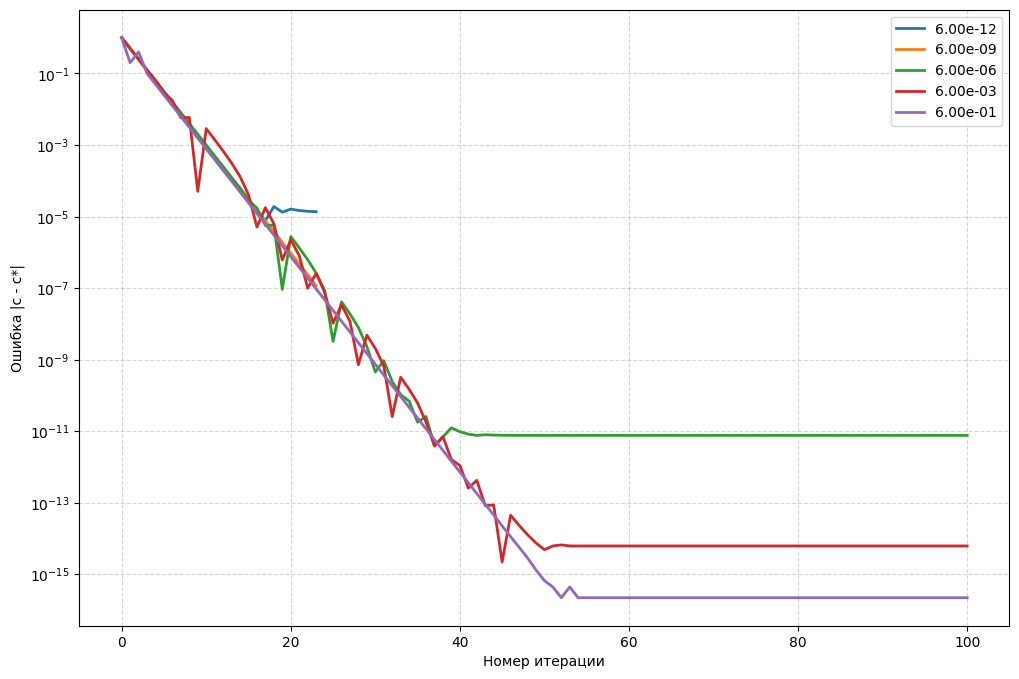

In [161]:
a, b = 0.0, 6.0
c_star = 2.0

delta_values = [1e-12*(b-a), 1e-9*(b-a), 1e-6*(b-a), 1e-3*(b-a), 1e-1*(b-a)]
delta_labels = [f'{d:.2e}' for d in delta_values]

results = {}
for delta_rel in delta_values:
    c, history = dichotomy_method(f, a, b, c_star,
                                  max_iter=100,
                                  epsilon=1e-6,
                                  delta=delta_rel)
    results[delta_rel] = history

plt.figure(figsize=(12, 8))
for i, delta_rel in enumerate(delta_values):
    history = results[delta_rel]
    plt.semilogy(range(len(history)), history, label=delta_labels[i], linewidth=2)

plt.xlabel('Номер итерации')
plt.ylabel('Ошибка |c - c*|')
plt.legend()
plt.grid(True, 'both', linestyle='--', alpha=0.5)
plt.show()

Что можно сказать о зависимости сходимости от значения параметра $\delta$? Объясните, почему для малых значений наблюдается плохая сходимость. Для какого значения наблюдается наилучшая сходимость?

In [162]:
# Ваше решение (Markdown)

# Ответ:
От параметра $\delta$ зависит сходимость, так при слишком малых и слишком больших $\delta$ наблюдается ухудшение сходимости. Для значения $\delta$ = 6*1e-9 наблюдается наилучшая сходимость. При очень малых $\delta$ становится затруднительно сравнивать значения из-за ограничений машинной точности, поэтому при малых значениях наблюдается плохая сходимость.

__e) (2 балла)__ До этого использовался подход с использованием постоянной величины $\delta$. Рассмотрим адаптивный подход, а именно - на каждой итерации значения $\delta$ будет определяться через длину интервала $l_k$, полученную на $k$-ой итерации. Предлагается рассмотреть следующие значения:

1. $\delta = 10^{-6} \cdot l_k$;
2. $\delta = 10^{-3} \cdot l_k$;
3. $\delta = 10^{-1} \cdot l_k$;
4. $\delta = 6^{-1} \cdot l_k$.

Последняя модификация также называется __тернарным__ поиском, при которой отрезок делится на 3 части на каждой итерации.

Постройте сравнительный график сходимости значения критерия от различных значений $\delta$. Также добавьте на график сходимость с наилучшим постоянным значением $\delta$, полученном в предыдущем пункте.

In [163]:
def dichotomy_adaptive(f, a, b, c_star, max_iter=100, epsilon=1e-6, **params):
    """
    Метод дихотомии для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        max_iter (int, optional): Максимальное количество итераций. По умолчанию 100.
        epsilon (float, optional): Точность поиска.
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.
        **params: Именованные гиперпараметры метода.
            params['delta'](a, b) - функция, возвращающая значение интервала на k-ой итерации.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """

    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")

    history = []

    # YOUR CODE HERE
    getcontext().prec = 50

    a = Decimal(a)
    b = Decimal(b)
    c_star_dec = Decimal(c_star)
    epsilon_dec = Decimal(epsilon)

    delta_relative = Decimal(str(params.get('delta', epsilon/10.0)))

    cur_iter = 0

    history.append(float( float(a + b) / 2.0 - float(c_star)))
    while cur_iter < max_iter and (b - a) > epsilon_dec:
        c = (a + b) / Decimal('2')
        delta_dec = Decimal(str(delta_relative)) * (b - a)

        x1 = max(a, c - delta_dec)
        x2 = min(b, c + delta_dec)

        if f(float(x1)) > f(float(x2)):
            a = x1
        else:
            b = x2

        current_center = float((a + b) / Decimal('2'))
        history.append(abs(current_center - c_star))
        cur_iter += 1

    c = float((a + b) / Decimal('2'))
    return c, history

<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-3357045369.py:7: SyntaxWarning: invalid escape sequence '\ '
  delta_labels = [f'{d:.2e}·$\ l_k $' for d in delta_values]


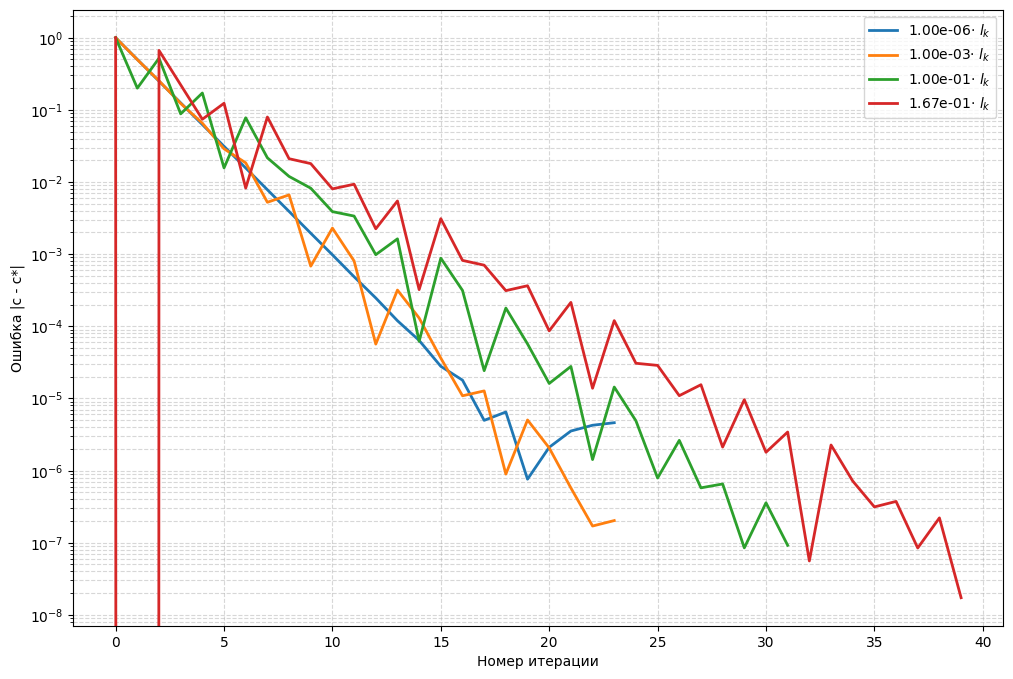

In [164]:
# Ваше решение (Code)
a, b = 0, 6.0
c_star = 2.0
epsilon = 1e-6

delta_values = [1e-6, 1e-3, 1e-1, 1/6.0]
delta_labels = [f'{d:.2e}·$\ l_k $' for d in delta_values]

results = {}
for delta_rel in delta_values:
    c, history = dichotomy_adaptive(f, a, b, c_star,
                                          max_iter=100,
                                          epsilon=epsilon,
                                          delta=delta_rel)
    results[delta_rel] = history

plt.figure(figsize=(12, 8))
for i, delta_rel in enumerate(delta_values):
    history = results[delta_rel]
    plt.semilogy(range(len(history)), history, label=delta_labels[i], linewidth=2)

plt.xlabel('Номер итерации')
plt.ylabel('Ошибка |c - c*|')
plt.legend()
plt.grid(True, 'both', linestyle='--', alpha=0.5)
plt.show()

Помогает ли использование адаптивного подхода в достижении лучшей сходимости?

In [165]:
# Ваше решение (Markdown)

# Ответ:
(В начале график для тернарного поиска попадал в нужную точку, потому ) <br>
Как видно из сравнительного графика сходимости выше, адаптивный подход даёт существенное преимущество, достигая нужной точности за меньшее количество итераций

__ё) (2 балла)__ Реализуйте метод __золотого сечения__. Для этого на каждой итерации подсчитываются точки $x_{1}, x_{2}$, симметричные относительно середины интервала и делящие исходный интервал в пропорции золотого сечения, то есть 1 к $\frac{1 + \sqrt{5}}{2}$. Обновления краевого значения происходит по аналогичной процедуре.

In [166]:
def golden_ration_method(f, a, b, c_star, epsilon=1e-6):
    """
    Метод золотого сечения для поиска минимума унимодальной функции на интервале [a, b].

    Параметры:
        f (callable): Унимодальная функция, минимум которой ищется.
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        c_star (float): Истинное значение точки минимума (для сравнения).
        epsilon (float, optional): Точность поиска.
            Поиск завершается, когда длина интервала становится меньше epsilon. По умолчанию 1e-6.

    Возвращает:
        c (float): Приближенное значение точки минимума.
        history (list): Список значений |c - c_star| на каждой итерации.
    """

    if a >= b:
        raise ValueError("Левая граница интервала a должна быть меньше правой границы b.")
    if epsilon <= 0:
        raise ValueError("Точность epsilon должна быть положительной.")

    history = []

    # YOUR CODE HERE

    getcontext().prec = 50
    a = Decimal(a)
    b = Decimal(b)
    c_star_dec = Decimal(c_star)
    epsilon_dec = Decimal(epsilon)

    phi = (Decimal(1) + Decimal(5).sqrt()) / Decimal(2)

    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    f1 = f(float(x1))
    f2 = f(float(x2))

    history = []
    cur_iter = 0

    while cur_iter < 100 and (b - a) > epsilon_dec:
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + (b - a) / phi
            f2 = f(float(x2))
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - (b - a) / phi
            f1 = f(float(x1))

        current_center = (a + b) / Decimal(2)
        history.append(float(abs(current_center - c_star_dec)))
        cur_iter += 1

    final_c = float((a + b) / Decimal(2))
    return final_c, history

Постройте график сходимости.

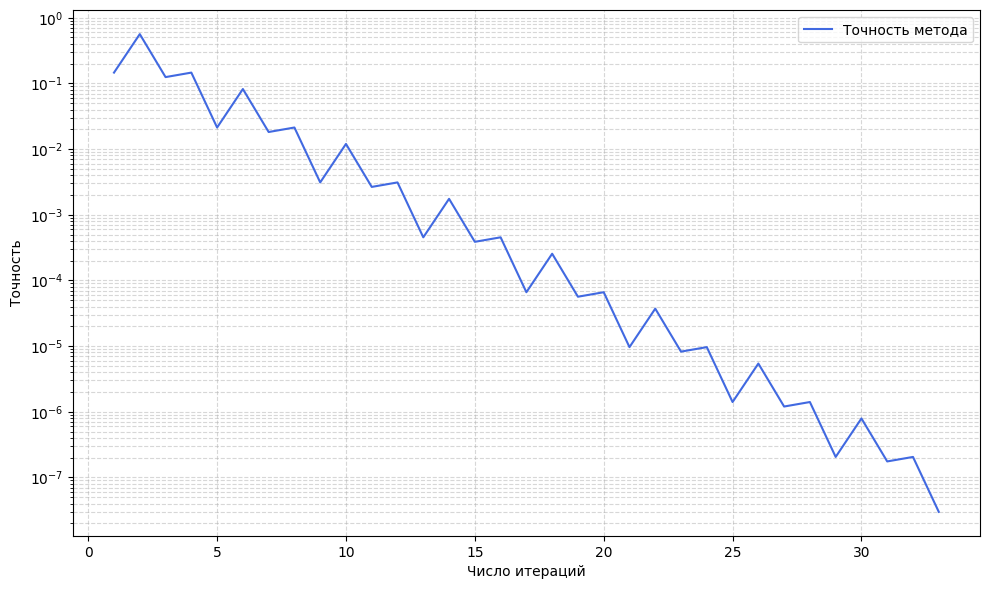

In [167]:
a, b = 0.0, 6.0
c_star = 2.0

def f(x):
    return x**2 - 4*x + 5

c, history = golden_ration_method(f, a, b, c_star, epsilon=1e-6)




iterations = list(range(1, len(history)+1))


plt.figure(figsize=(10, 6))
plt.plot(iterations, history, label='Точность метода', color='royalblue')
plt.yscale('log')
plt.xlabel('Число итераций')
plt.ylabel('Точность')
plt.legend()
plt.grid(True, 'both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

__ж) (1.5 балла)__ Постройте сравнительные графики для методов ```dichotomy_method```, ```dichotomy_adaptive``` и ```golden_ratio_method``` для оптимальных значений параметра $\delta$. Первый график должен быть значением критерия от числа итераций.

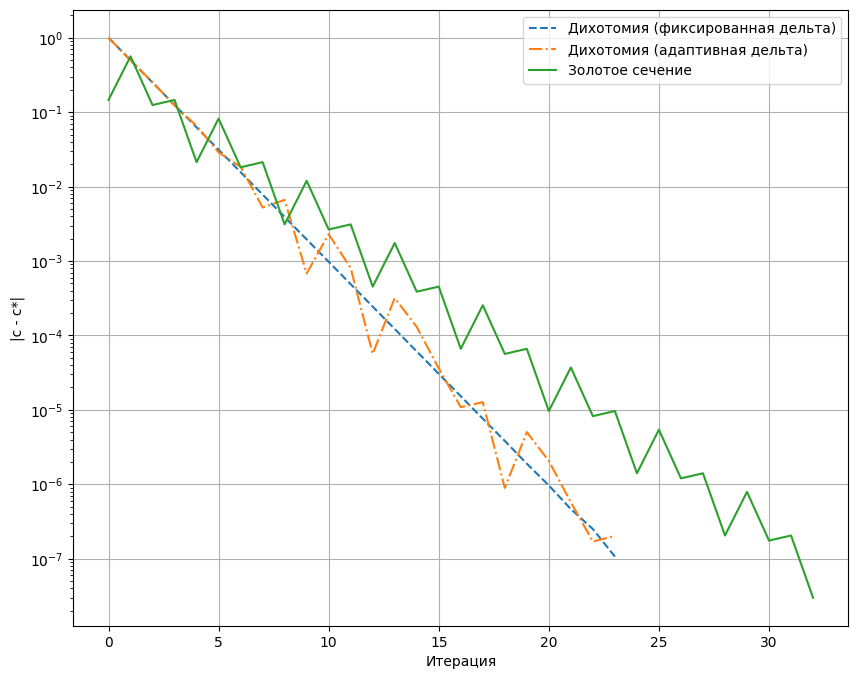

In [168]:
c1, history1 = dichotomy_method(f, a, b, c_star, max_iter=100, epsilon=epsilon, delta=6.0*1e-9*(b-a))
c2, history2 = dichotomy_adaptive(f, a, b, c_star, max_iter=100, epsilon=epsilon, delta=1e-3)
c3, history3 = golden_ration_method(f, a, b, c_star, epsilon=epsilon)

plt.figure(figsize=(10, 8))
plt.plot(history1, label='Дихотомия (фиксированная дельта)', linestyle='--')
plt.plot(history2, label='Дихотомия (адаптивная дельта)', linestyle='-.')
plt.plot(history3, label='Золотое сечение')
plt.yscale('log')
plt.xlabel('Итерация')
plt.ylabel('|c - c*|')
plt.legend()
plt.grid(True)
plt.show()

Второй - критерий от количества вызовов функции $f$.

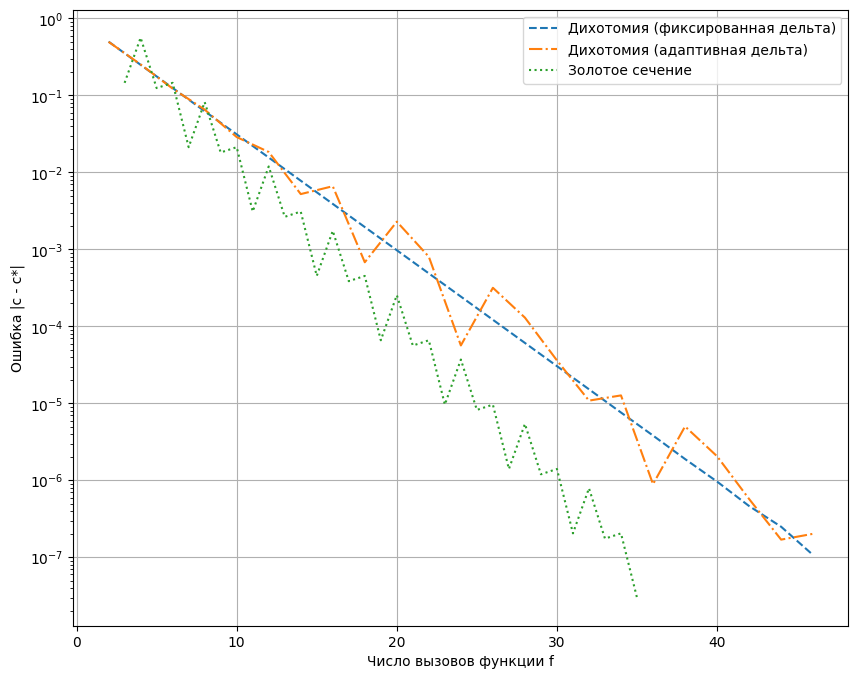

In [169]:
calls1 = [2 * i for i in range(1, len(history1))]
errors1 = history1[1:]

# Объяснение почему ниже (в ответе)
calls2 = [2 * i for i in range(1, len(history2))]
errors2 = history2[1:]
calls3 = [3 + i for i in range(len(history3))]
errors3 = history3

plt.figure(figsize=(10, 8))
plt.plot(calls1, errors1, label='Дихотомия (фиксированная дельта)', linestyle='--')
plt.plot(calls2, errors2, label='Дихотомия (адаптивная дельта)', linestyle='-.')
plt.plot(calls3, errors3, label='Золотое сечение', linestyle=':')
plt.yscale('log')
plt.xlabel('Число вызовов функции f')
plt.ylabel('Ошибка |c - c*|')
plt.legend()
plt.grid(True)
plt.show()

Что можно сказать о применимости метода золотого сечения? В чем он лучше по сравнению с методом дихотомии?

In [170]:
# Ваше решение (Markdown)

# Ответ:
Несмотря на то, что метод золотого сечения даёт результаты хуже, чем у метода дихотомии при правильном выборе $\delta$, при отсутствии ресурсов для поиска оптимальной дельты, он даёт сходимость лучше (в зависимости от числа итераций), чем при некорректном выборе параметра. <br>
Если же учесть сложность вычисления из-за вызовов функции f, то при большом числе итераций становится выгоднее использовать метод золотого сечения, так как он требует меньше обращений к функции f для каждой итерации:
*   Методы дихотомии требуют 2 вызова для каждой итерации
*   Метод золотого сечения требует 2 вызова в первый раз, затем по 1 на каждую итерацию